In [1]:
from google.colab import files
uploaded = files.upload()


Saving Tweets.csv.zip to Tweets.csv.zip


In [2]:
import zipfile
import os

zip_file = 'Tweets.csv.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config', 'Tweets.csv', 'Tweets.csv.zip', 'sample_data']

In [3]:
import pandas as pd

df = pd.read_csv("Tweets.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
!pip install vaderSentiment wordcloud

import pandas as pd
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

df = pd.read_csv("Tweets.csv")
df = df[['text']].dropna()
df = df.rename(columns={'text': 'Post'})

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['Clean_Post'] = df['Post'].apply(clean_text)

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Score'] = df['Clean_Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment'] = df['Score'].apply(get_sentiment)

df[['Post', 'Sentiment']].head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


,Post,Sentiment
0,@VirginAmerica What @dhepburn said.,Neutral
1,@VirginAmerica plus you've added commercials t...,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,Neutral
3,@VirginAmerica it's really aggressive to blast...,Negative
4,@VirginAmerica and it's a really big bad thing...,Negative


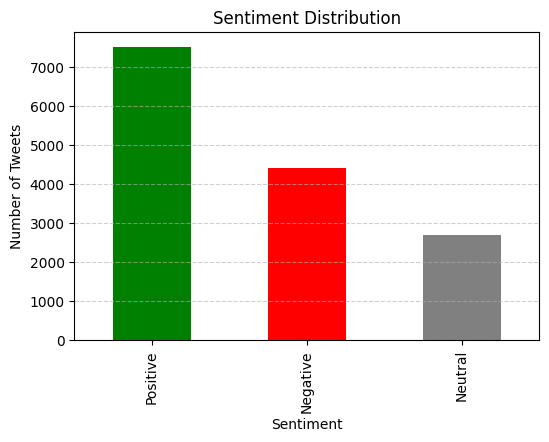

In [5]:
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


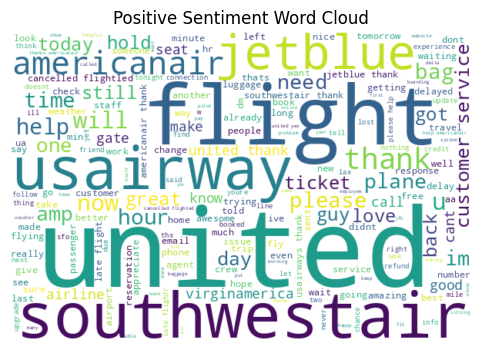

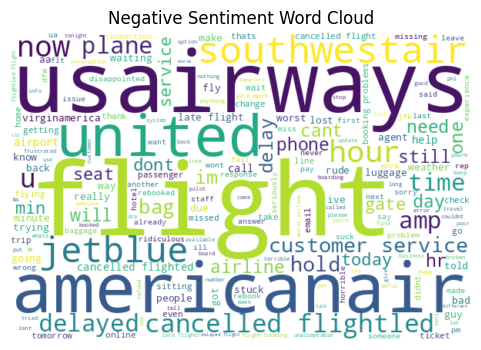

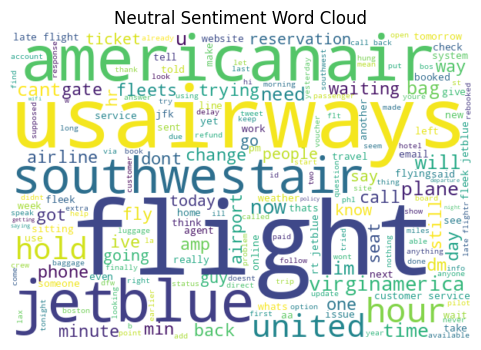

In [6]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Post'])
    if text:
        wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
        plt.figure(figsize=(6,4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{sentiment} Sentiment Word Cloud")
        plt.show()
